In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import librosa
import csv
import os

# MAIN
#
def main():
    # Initial Parameters
    lr = 0.001
    iterations_train = 50
    bsize = 64
    audio_features = 20  
    utterance_length = 35  # Modify to see what different results you can get
    ndigits = 10

    # Get training data
    file_path = "../data/recordings/train/8_theo_20.wav"
    files_path = "../data/recordings/train"
    raw_w, sr = librosa.load(file_path, mono=True)

   

# Creating Dataset

    header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
    for i in range(1, 21):
      header += f' mfcc{i}'
    header += ' label'
    header = header.split()
    print(header)
    file = open('data.csv', 'w', newline='')
    with file:
      writer = csv.writer(file)
      writer.writerow(header)
    genres = '1 2 3 4 5 6 7 8 9 0'.split()
    for filename in os.listdir(files_path):
        number = f'{files_path}/{filename}'
        y, sr = librosa.load(number, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())
    return 0
main()


['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']


0

In [2]:
#Reading a dataset and convert file name to corresbonding umnber

import pandas as pd
import csv
data = pd.read_csv('data.csv')
data['number'] = data['filename'].str[:1]
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label,number
0,0_jackson_0.wav,0.241461,0.112672,741.829081,758.492178,1438.494873,0.034023,-295.578461,189.853683,-19.606564,...,-5.172223,-8.323026,-10.299589,-0.144793,-9.017329,-4.569392,2.881349,-15.627436,NaN,0
1,0_jackson_1.wav,0.238694,0.090344,635.610880,670.336296,1160.452403,0.033458,-339.148743,204.005249,-7.485526,...,-1.290891,-5.515564,-15.416287,0.405876,-3.624587,-11.204143,-0.096359,-6.751650,NaN,0
2,0_jackson_10.wav,0.245599,0.091456,667.786694,732.606545,1257.180176,0.033268,-327.507416,195.596924,-3.994768,...,-3.098450,-10.447586,-10.053793,3.248016,-11.686995,-10.726046,6.857377,-9.067446,NaN,0
3,0_jackson_11.wav,0.261694,0.087751,712.304185,731.292437,1449.104818,0.035916,-320.809937,200.023743,-8.186146,...,-1.118007,-6.681235,-11.685319,2.010999,-5.946658,-6.905020,4.136240,-9.614882,NaN,0
4,0_jackson_12.wav,0.302089,0.096603,844.363886,777.868127,1569.583263,0.049465,-315.801300,195.674118,-13.324564,...,6.031695,-6.353736,-15.983871,1.465030,-5.109472,-8.666434,5.026890,-5.346444,NaN,0


In [3]:
#Dropping unnecessary columns
data = data.drop(['filename'],axis=1)
data = data.drop(['label'],axis=1)
data = data.drop(['chroma_stft'],axis=1)
data.shape

(1480, 26)

In [4]:
# we’ll encode genres into integers
from sklearn import preprocessing
genre_list = data['number']
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(genre_list)
data.tail()

,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,number
1475,0.005692,904.242501,912.018606,1884.693604,0.037012,-573.046753,213.107422,-71.503036,23.391672,41.621361,...,-17.033361,2.310104,-7.309676,-10.210205,-3.549676,-24.257940,-13.669874,2.822646,-17.597813,9
1476,0.006362,918.104548,981.241130,1948.754883,0.035714,-567.125610,213.876129,-71.092758,27.683588,39.902252,...,-18.858164,3.211400,-11.240519,-11.333280,-0.739633,-24.070318,-11.294357,4.757043,-20.614614,9
1477,0.007046,929.724094,948.866615,1845.622173,0.039011,-564.273743,213.522720,-75.485138,26.547956,41.475002,...,-21.700708,2.268953,-10.723814,-9.647504,-0.024529,-25.916891,-12.202823,5.977343,-16.882366,9
1478,0.005221,974.226613,923.570385,1849.588816,0.045796,-566.700012,216.096710,-68.707542,16.947353,40.893364,...,-16.664474,1.102790,-3.793747,-7.993629,-0.721535,-16.744701,-11.211341,1.916284,-15.097013,9
1479,0.004853,987.124366,940.056828,1968.588096,0.050216,-573.547668,222.053482,-65.773590,22.183229,34.929371,...,-20.156139,1.456851,-1.521448,-1.297065,5.405921,-17.469110,-11.722614,1.544921,-17.585129,9


In [5]:
# Splitting the dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X = np.array(data.iloc[:, :-1], dtype = float)
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [6]:
#Normalizing the dataset
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
X_train = scaler.fit_transform( X_train )
X_test = scaler.transform( X_test )
print(X_train.shape)


(1184, 25)


In [7]:
# Shuffle the training set and Test set
from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)
rs.get_n_splits(X_train)
rs.get_n_splits(X_test)
rs.get_n_splits(y_train)
rs.get_n_splits(y_test)
print(y_test)

795     5
639     4
914     6
49      0
929     6
       ..
691     4
322     2
1318    8
1063    7
210     1
Name: number, Length: 296, dtype: object


In [8]:
#Creating a Model
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
# Learning Process of a model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# simple early stopping
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [11]:
#Train with early stopping to avoid overfitting
history = model.fit(X_train,
                    y_train,validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=128, callbacks=[es])


Train on 1184 samples, validate on 296 samples
Epoch 1/50
1184/1184 [==============================] - 0s 119us/step - loss: 2.0062 - accuracy: 0.3885 - val_loss: 1.6106 - val_accuracy: 0.5338
Epoch 2/50
1184/1184 [==============================] - 0s 21us/step - loss: 1.3359 - accuracy: 0.6394 - val_loss: 1.0261 - val_accuracy: 0.7500
Epoch 3/50
1184/1184 [==============================] - 0s 25us/step - loss: 0.7988 - accuracy: 0.8269 - val_loss: 0.5812 - val_accuracy: 0.9088
Epoch 4/50
1184/1184 [==============================] - 0s 27us/step - loss: 0.4688 - accuracy: 0.8919 - val_loss: 0.3477 - val_accuracy: 0.9324
Epoch 5/50
1184/1184 [==============================] - 0s 28us/step - loss: 0.2867 - accuracy: 0.9586 - val_loss: 0.2461 - val_accuracy: 0.9459
Epoch 6/50
1184/1184 [==============================] - 0s 24us/step - loss: 0.1926 - accuracy: 0.9637 - val_loss: 0.1768 - val_accuracy: 0.9561
Epoch 7/50
1184/1184 [==============================] - 0s 25us/step - loss: 0.14

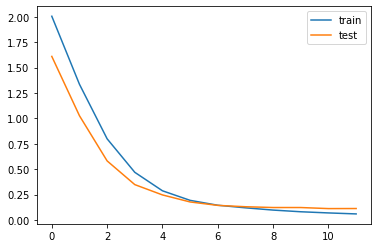

In [12]:
# plot training history
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [13]:
# Predection 
print('\n# Generate predictions for 3 samples')
predictions = model.predict(X_test)
model.evaluate(X_test,y_test)


# Generate predictions for 3 samples
296/296 [==============================] - 0s 27us/step


[0.11216524847455926, 0.962837815284729]

In [14]:
print(predictions)

[[2.77210870e-06 5.32862768e-02 6.53733105e-06 ... 4.51203596e-05
  1.75682449e-04 1.08488067e-03]
 [3.06936074e-03 1.86787645e-07 5.44844969e-09 ... 8.58527604e-13
  1.02441886e-13 5.82823590e-12]
 [2.35718835e-05 6.47516814e-08 1.52438588e-05 ... 3.33277369e-03
  9.25722852e-05 1.29011096e-05]
 ...
 [4.28030340e-08 5.29368435e-07 1.82266103e-06 ... 1.02296253e-04
  9.97535706e-01 3.15659759e-06]
 [1.05262006e-05 6.44978019e-04 2.35883093e-07 ... 9.79516208e-01
  6.81392121e-05 3.37831560e-03]
 [6.90978989e-02 3.17238718e-01 7.46359304e-03 ... 3.72635007e-01
  7.02586083e-04 5.62565997e-02]]


In [15]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[26  1  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  1  0  1  0  0]
 [ 2  0 25  1  0  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  1  1  0]
 [ 0  0  0  0 32  0  0  0  0  0]
 [ 0  1  0  0  0 28  0  0  0  0]
 [ 0  0  0  0  0  0 29  1  0  0]
 [ 0  0  0  0  0  0  0 21  0  0]
 [ 0  0  0  0  0  0  0  0 33  0]
 [ 2  2  1  0  0  0  0  0  0 37]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        27
           1       0.87      0.93      0.90        28
           2       0.96      0.89      0.93        28
           3       0.96      0.92      0.94        26
           4       1.00      1.00      1.00        32
           5       0.97      0.97      0.97        29
           6       1.00      0.97      0.98        30
           7       0.88      1.00      0.93        21
           8       0.97      1.00      0.99        33
           9       1.00      0.88      0.94        42

    accuracy                           0.95       296
   macro avg       

In [17]:
#!pip install pydub